In [19]:
# program using Logistic Regression to prediction hand written numbers
# author Hoan Ngo (Feb 20, 2022)
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
X, y = datasets.load_digits(return_X_y=True)


In [20]:
#ths size of the data
X.shape

(1797, 64)

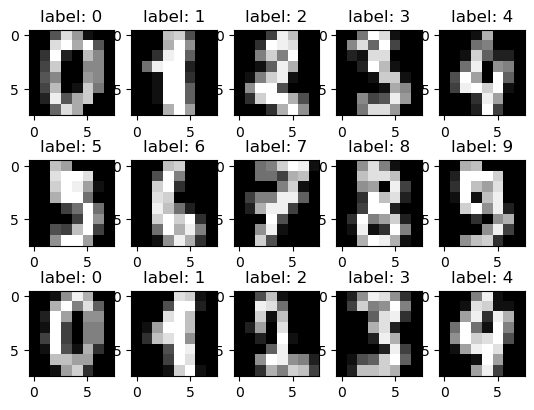

In [425]:
#plot the first 15
from matplotlib import pyplot as plt
fig = plt.figure()
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(np.reshape(X[i,:], (8, 8)), interpolation='nearest', cmap='gray')
    ax.set_title(f'label: {y[i]}')
plt.show()

In [25]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:


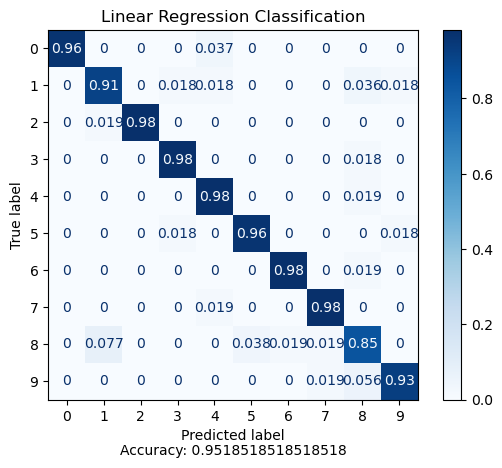

Accuracy: 0.9518518518518518
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.91      0.91      0.91        55
           2       1.00      0.98      0.99        53
           3       0.96      0.98      0.97        55
           4       0.93      0.98      0.95        54
           5       0.96      0.96      0.96        55
           6       0.98      0.98      0.98        54
           7       0.96      0.98      0.97        54
           8       0.85      0.85      0.85        52
           9       0.96      0.93      0.94        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



In [426]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

lr = LogisticRegression(C=10.0, solver='lbfgs', multi_class='auto')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Plotting confusion matrix
matrix = plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
print("Confusion Matrix:")
plt.title("Linear Regression Classification")
plt.text(4.5,11, f'Accuracy: {accuracy}', fontsize=10, ha='center')

plt.show(matrix)
plt.show()

# Calculate accuracy

print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9944444444444445
Misclassified examples: 3
Confusion Matrix:


c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


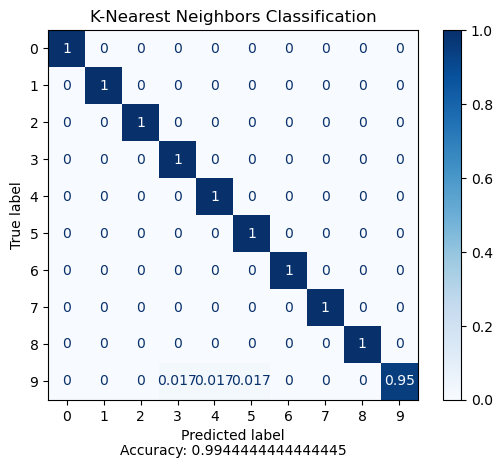

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       1.00      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [323]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

k = 6  # worst example is k = 1437, gives an accuracy of .077777 with 332 missed examples. the best example was at k=6 with 4 missed examples at .988888
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

matrix = plot_confusion_matrix(knn_model, X_test,y_test, cmap=plt.cm.Blues,normalize='true')
print("Confusion Matrix:")
plt.title("K-Nearest Neighbors Classification")
plt.text(4.5,11, f'Accuracy: {accuracy}', fontsize=10, ha='center')
plt.show(matrix)

print(classification_report(y_test, y_pred))


Accuracy: 0.9444444444444444
Misclassified examples: 30
Confusion Matrix:


c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


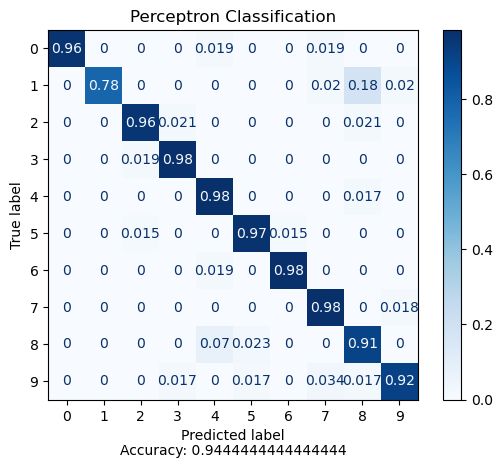

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       1.00      0.78      0.88        50
           2       0.96      0.96      0.96        47
           3       0.96      0.98      0.97        54
           4       0.92      0.98      0.95        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       0.93      0.98      0.96        55
           8       0.76      0.91      0.83        43
           9       0.96      0.92      0.94        59

    accuracy                           0.94       540
   macro avg       0.95      0.94      0.94       540
weighted avg       0.95      0.94      0.94       540



In [427]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

perceptron_model = Perceptron()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the model
perceptron_model.fit(X_train, y_train)

# Make predictions
y_pred = perceptron_model.predict(X_test)

# Generate confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
# Generate confusion matrix
matrix = plot_confusion_matrix(perceptron_model, X_test,y_test, cmap=plt.cm.Blues,normalize='true')
print("Confusion Matrix:")
plt.title("Perceptron Classification")
plt.text(4.5,11, f'Accuracy: {accuracy}', fontsize=10, ha='center')
plt.show(matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.9629629629629629
Misclassified examples: 20


c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:


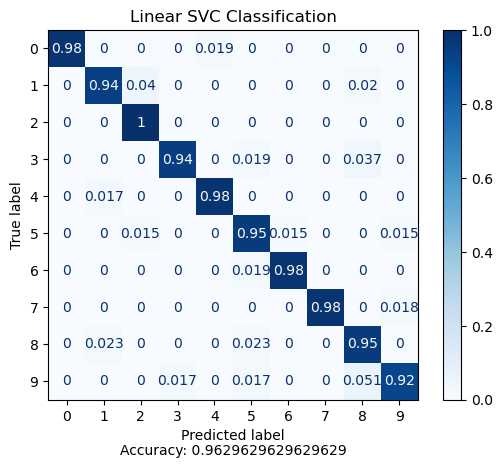

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.94      0.95        50
           2       0.94      1.00      0.97        47
           3       0.98      0.94      0.96        54
           4       0.98      0.98      0.98        60
           5       0.94      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.87      0.95      0.91        43
           9       0.96      0.92      0.94        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [375]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Linear SVM model
svc1 = LinearSVC(C=0.001, class_weight='balanced', dual=False)

# Train the model
svc1.fit(X_train, y_train)

# Make predictions
y_pred = svc1.predict(X_test)

# Generate confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
# Generate confusion matrix
matrix = plot_confusion_matrix(svc1, X_test,y_test, cmap=plt.cm.Blues,normalize='true')
print("Confusion Matrix:")
plt.title("Linear SVC Classification")
plt.text(4.5,11, f'Accuracy: {accuracy}', fontsize=10, ha='center')
plt.show(matrix)
print(classification_report(y_test, y_pred))


Accuracy: 0.9888888888888889
Misclassified examples: 6
Confusion Matrix:


c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


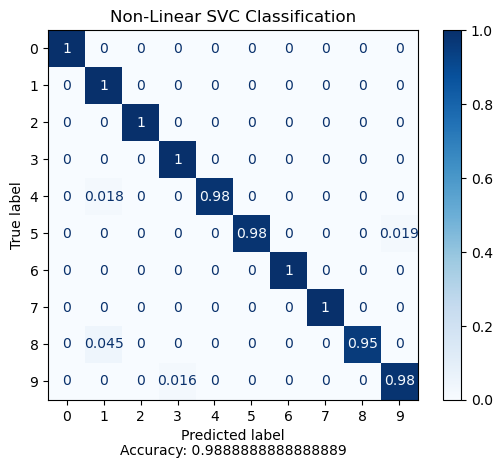

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.91      1.00      0.95        41
           2       1.00      1.00      1.00        45
           3       0.98      1.00      0.99        41
           4       1.00      0.98      0.99        57
           5       1.00      0.98      0.99        54
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        55
           8       1.00      0.95      0.98        66
           9       0.98      0.98      0.98        63

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [385]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Initialize Linear SVM model
svc = SVC(kernel='rbf', C=100.0, gamma='scale')

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Generate confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
# Generate confusion matrix
matrix = plot_confusion_matrix(svc, X_test,y_test, cmap=plt.cm.Blues,normalize='true')
print("Confusion Matrix:")
plt.title("Non-Linear SVC Classification")
plt.text(4.5,11, f'Accuracy: {accuracy}', fontsize=10, ha='center')
plt.show(matrix)
print(classification_report(y_test, y_pred))


Accuracy: 0.8444444444444444
Misclassified examples: 84


c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix:


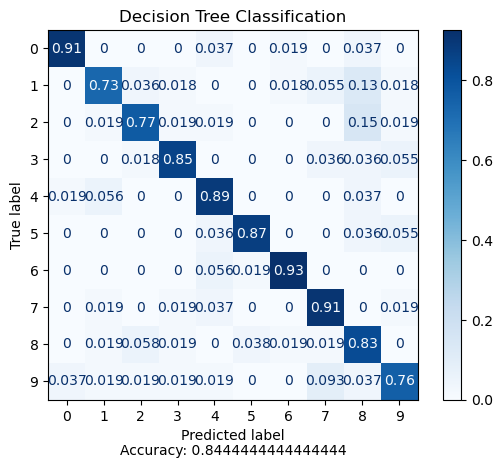

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        54
           1       0.85      0.73      0.78        55
           2       0.85      0.77      0.81        53
           3       0.90      0.85      0.88        55
           4       0.81      0.89      0.85        54
           5       0.94      0.87      0.91        55
           6       0.94      0.93      0.93        54
           7       0.82      0.91      0.86        54
           8       0.63      0.83      0.72        52
           9       0.82      0.76      0.79        54

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.85       540
weighted avg       0.85      0.84      0.85       540



In [428]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42,stratify=y)


# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=25, min_samples_split=3, min_samples_leaf=1)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Generate confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
# Generate confusion matrix
matrix = plot_confusion_matrix(decision_tree_model, X_test,y_test, cmap=plt.cm.Blues,normalize='true')
print("Confusion Matrix:")
plt.title("Decision Tree Classification")
plt.text(4.5,11, f'Accuracy: {accuracy}', fontsize=10, ha='center')
plt.show(matrix)
print(classification_report(y_test, y_pred))



Accuracy: 0.9666666666666667
Misclassified examples: 18
Confusion Matrix:


c:\Users\Aiden\miniforge3\envs\pyml-book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


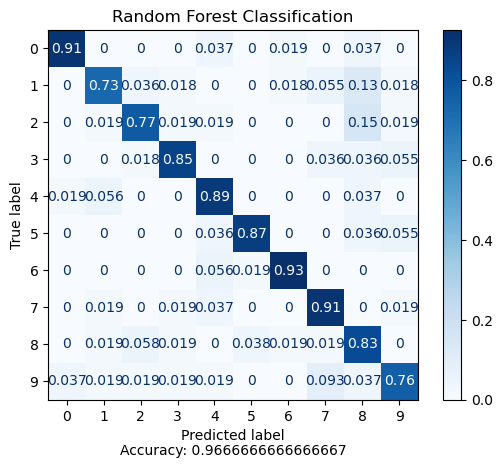

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      0.98      0.96        55
           2       1.00      1.00      1.00        53
           3       0.96      0.98      0.97        55
           4       0.98      0.98      0.98        54
           5       0.98      0.98      0.98        55
           6       1.00      0.98      0.99        54
           7       0.92      1.00      0.96        54
           8       0.92      0.88      0.90        52
           9       0.98      0.91      0.94        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [430]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42,stratify=y)


# Initialize Decision Tree model
random_forest_model = RandomForestClassifier(max_depth=25, min_samples_split=3, min_samples_leaf=1)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Generate confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
# Generate confusion matrix
matrix = plot_confusion_matrix(decision_tree_model, X_test,y_test, cmap=plt.cm.Blues,normalize='true')
print("Confusion Matrix:")
plt.title("Random Forest Classification")
plt.text(4.5,11, f'Accuracy: {accuracy}', fontsize=10, ha='center')
plt.show(matrix)
print(classification_report(y_test, y_pred))



In [431]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
# or scores for the positive class
# for the linear models I was not able to collect the AUC score
random_forest_model = RandomForestClassifier(random_state=42)
knn_model.fit(X_train, y_train) 
y_pred = knn_model.predict_proba(X_test)[:, 1] 
y_score = knn_model.fit(X_train, y_train).predict_proba(X_test)
auc = roc_auc_score(y_test, y_score, multi_class='ovr')  # change multi-class to ovr, it cannot calculate if multi-class is ovo
print(auc)


0.9957345897369441
